<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/task_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

plt.style.use('default')

In [48]:
# power_df = pd.read_csv('/content/PowerGeneration - PowerGeneration.csv')
power_df_raw = pd.read_csv('/content/PowerGeneration - PowerGeneration.csv')
power_df_raw

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0


## **Problem 1 to 2:**

**Dataset link:** https://rb.gy/gsmddu

**Add a label to every axis and add a proper title for the charts (For every subplot, it is applicable). Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

In [49]:
power_df_raw.columns

Index(['Dates', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)',
       'Programme or Expected(MU)', 'Actual(MU)', 'Excess(+) / Shortfall (-)',
       'Deviation'],
      dtype='object')

In [50]:
power_df_raw.isna().sum()

,0
Dates,0
Power Station,0
Monitored Cap.(MW),0
Total Cap. Under Maintenace (MW),0
Planned Maintanence (MW),0
Forced Maintanence(MW),0
Other Reasons (MW),0
Programme or Expected(MU),0
Actual(MU),0
Excess(+) / Shortfall (-),0


### **Problem-1:** Make a subplots which have 2 plots.

- For the first chart, draw a scatter plot "*Monitored Cap.(MW)*" vs "*Total Cap. Under Maintenance (MW)*" of top 5 most frequent power stations. Then draw the lines which indicate the average values of these two columns. Change the colors according to the names of the Power Stations.
- For the second chart, draw a scatter plot "*Monitored Cap. (MW)*" vs "*Actual(MU)*" of the top 5 most frequent power stations. Also draw the lines which indicates the average values of these two columns. Change the colors according to the names of the Power Stations.


In [51]:
# top5 = power_df['Power Station'].value_counts().nlargest(5).index
# top5
# Index(['NTPC Ltd.', 'NHPC', 'NPCIL', 'GMR ENERG', 'APL'], dtype='object', name='Power Station')
top5 = power_df_raw['Power Station'].value_counts().head().index.tolist()
top5
# ['NTPC Ltd.', 'NHPC', 'NPCIL', 'GMR ENERG', 'APL']

['NTPC Ltd.', 'NHPC', 'NPCIL', 'GMR ENERG', 'APL']

In [59]:
temp_df = power_df_raw[power_df_raw['Power Station'].isin(top5)]

In [60]:
encoder = LabelEncoder()
temp_df['Power Station'] = encoder.fit_transform(temp_df['Power Station'])

/tmp/ipython-input-1815760082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Power Station'] = encoder.fit_transform(temp_df['Power Station'])


In [62]:
temp_df.shape

(30624, 11)

Text(0, 0.5, 'Actual(MU)')

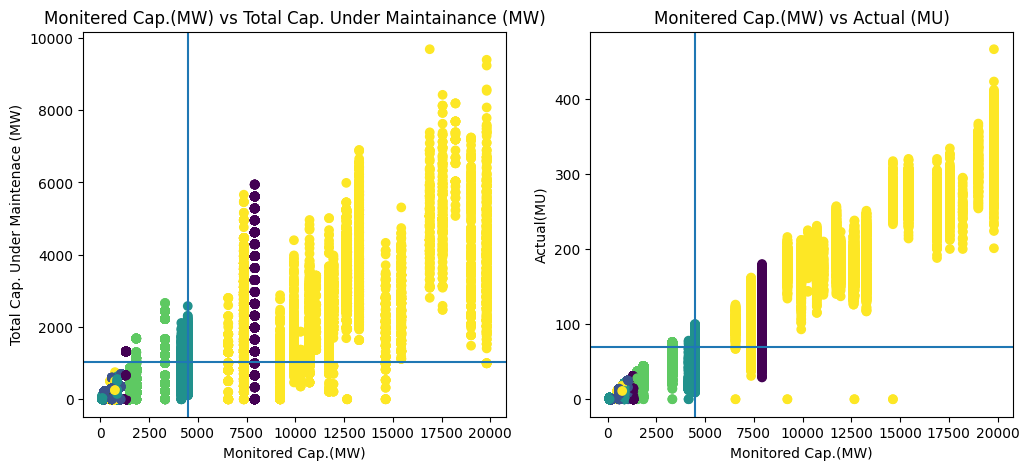

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].scatter(temp_df['Monitored Cap.(MW)'], temp_df['Total Cap. Under Maintenace (MW)'], c = temp_df['Power Station'])
ax[0].axvline(temp_df['Monitored Cap.(MW)'].mean())
ax[0].axhline(temp_df['Total Cap. Under Maintenace (MW)'].mean())
ax[0].set_title('Monitered Cap.(MW) vs Total Cap. Under Maintainance (MW)')
ax[0].set_xlabel('Monitored Cap.(MW)')
ax[0].set_ylabel('Total Cap. Under Maintenace (MW)')

# ax2 = plt.subplot(1, 2, 2)
ax[1].scatter(temp_df['Monitored Cap.(MW)'], temp_df['Actual(MU)'], c = temp_df['Power Station'])
ax[1].axvline(temp_df['Monitored Cap.(MW)'].mean())
ax[1].axhline(temp_df['Actual(MU)'].mean())
ax[1].set_title('Monitered Cap.(MW) vs Actual (MU)')
ax[1].set_xlabel('Monitored Cap.(MW)')
ax[1].set_ylabel('Actual(MU)')

### **Problem-2:** Draw a 3D Scatter plot between "*Monitored Cap.(MW)*", "*Total Cap. Under Maintenace (MW)*" and "*Forced Maintanence(MW)*"

Text(0.5, 0, 'Forced Maintanence(MW')

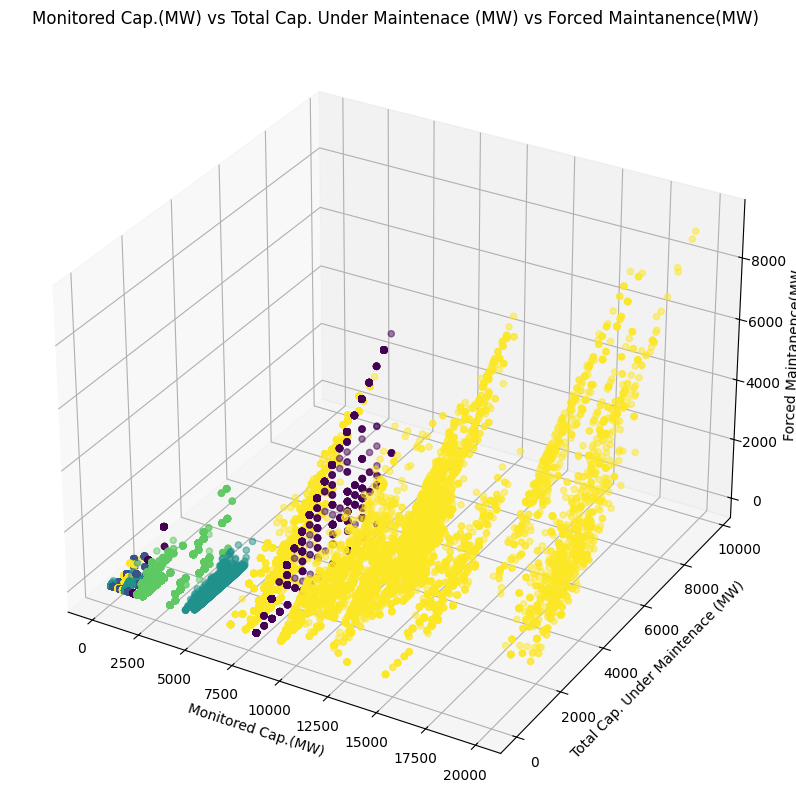

In [71]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(temp_df['Monitored Cap.(MW)'], temp_df['Total Cap. Under Maintenace (MW)'], temp_df['Forced Maintanence(MW)'], alpha = 0.5, c = temp_df['Power Station'])
ax.set_title('Monitored Cap.(MW) vs Total Cap. Under Maintenace (MW) vs Forced Maintanence(MW)')
ax.set_xlabel('Monitored Cap.(MW)')
ax.set_ylabel('Total Cap. Under Maintenace (MW)')
ax.set_zlabel('Forced Maintanence(MW')

### **Problem-3:** Make a 3D *Surface* plot of this below mathematical equation.

$$z = |x| - |y|$$

In [77]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)
z = np.abs(xx) - np.abs(yy)

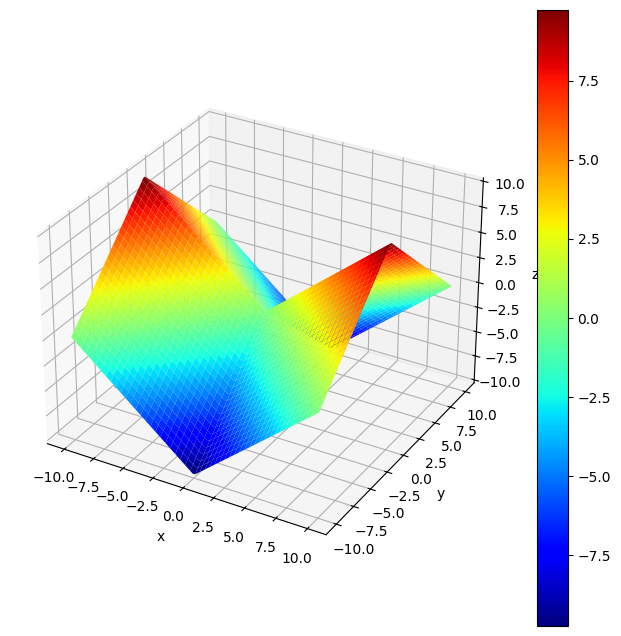

In [85]:
fig = plt.figure(figsize = (8, 8))

ax = plt.subplot(projection = '3d')

sub = ax.plot_surface(xx, yy, z, cmap = 'jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

fig.colorbar(sub)

### **Problem-4:** Draw the 3D *Contour plot* of this below equation:

$$z = |x| - |y|$$

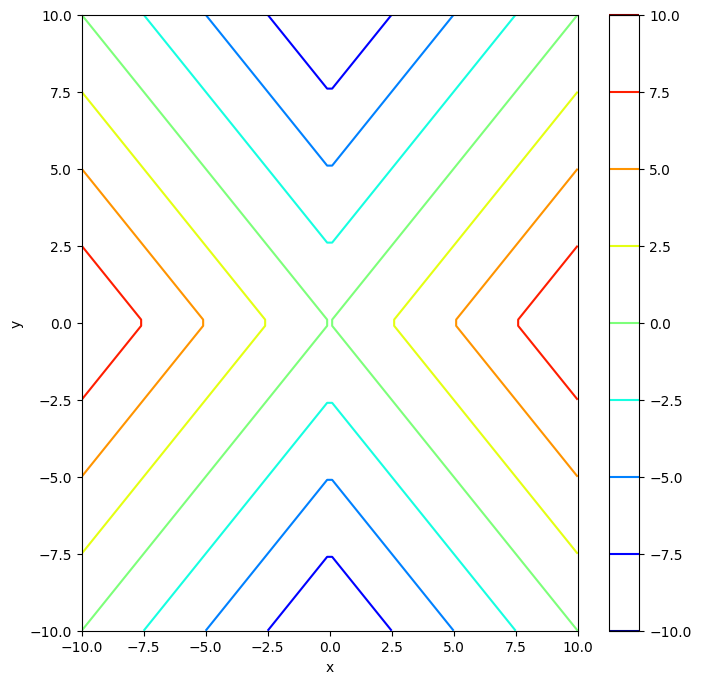

In [91]:
fig = plt.figure(figsize = (8, 8))

ax = plt.subplot()

sub = ax.contour(xx, yy, z, cmap = 'jet')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.colorbar(sub)

### **Problem-5:** Draw a second type of Countour plot of the below equation:

$$z = |x| - |y|$$

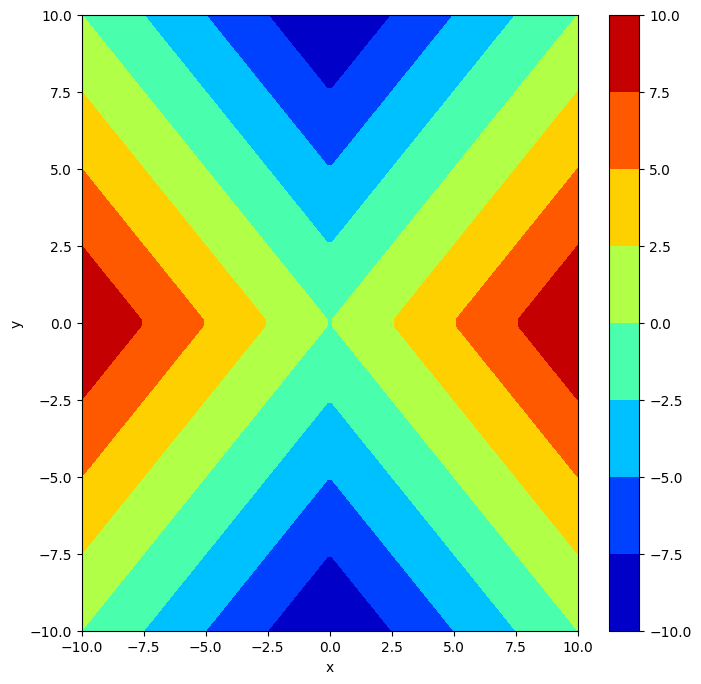

In [92]:
fig = plt.figure(figsize = (8, 8))

ax = plt.subplot()

sub = ax.contourf(xx, yy, z, cmap = 'jet')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.colorbar(sub)

## `Problem 6-7`

Data Set Link - https://docs.google.com/spreadsheets/d/17tUL2yC7MGvo7txuuhLtAI-b6_C4jc0t7FLFxqRm-uI/edit?usp=share_link


**Description of Dataset:**

* Date: It gives the date of which stocks details are given.
* Symbol: Name of stock
* Open: It gives the opening price of stock on that date.
* High: It gives the highest price to which the stock ascened on that day.
* Low: It gives the highest price to which the stock plummeted on that day.
* Close: It gives the closing price of stock on that date.
* Volume: It gives the amount of stock traded on that date.
* VWAP: The volume-weighted average price (VWAP) is a statistic used by traders to determine what the average price is based on both price and volume.
* Turnover:

In [113]:
stocks = pd.read_csv('/content/nifty-50 - nifty-50.csv')
stocks.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN


In [114]:
stocks.info()
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466207 entries, 0 to 466206
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        466207 non-null  object 
 1   Symbol      466207 non-null  object 
 2   Series      466207 non-null  object 
 3   Prev Close  466207 non-null  float64
 4   Open        466207 non-null  float64
 5   High        466207 non-null  float64
 6   Low         466207 non-null  float64
 7   Last        466207 non-null  float64
 8   Close       466207 non-null  float64
 9   VWAP        466207 non-null  float64
 10  Volume      466207 non-null  int64  
 11  Turnover    466207 non-null  float64
 12  Trades      235776 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 46.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466207 entries, 0 to 466206
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   --

In [115]:
stocks.set_index(stocks['Date'], inplace = True)
stocks

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
Date,,,,,,,,,,,,,
2000-01-03,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN
2000-01-04,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN
2000-01-05,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN
2000-01-06,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN
2000-01-07,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-02-11,2009-02-11,INDUSINDBK,EQ,34.35,33.95,35.40,33.25,35.25,35.05,34.52,211307,7.294333e+11,NaN
2009-02-12,2009-02-12,INDUSINDBK,EQ,35.05,35.40,36.80,34.60,35.10,34.85,35.63,248230,8.844395e+11,NaN
2009-02-13,2009-02-13,INDUSINDBK,EQ,34.85,34.95,35.90,34.10,34.50,34.45,35.04,175355,6.143661e+11,NaN


In [130]:
temp_stocks_df = stocks[stocks.index.year == 2020]
temp_stocks_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
Date,,,,,,,,,,,,,
2020-01-01,2020-01-01,HDFCBANK,EQ,1272.10,1276.10,1280.00,1270.60,1279.00,1278.60,1276.64,1836849,2.345001e+14,46625.0
2020-01-02,2020-01-02,HDFCBANK,EQ,1278.60,1279.00,1288.00,1279.00,1286.00,1286.75,1284.56,3068583,3.941792e+14,104570.0
2020-01-03,2020-01-03,HDFCBANK,EQ,1286.75,1282.20,1285.00,1263.60,1268.50,1268.40,1270.48,5427775,6.895886e+14,157066.0
2020-01-06,2020-01-06,HDFCBANK,EQ,1268.40,1260.00,1261.80,1236.00,1240.25,1240.95,1247.24,5445093,6.791348e+14,155007.0
2020-01-07,2020-01-07,HDFCBANK,EQ,1240.95,1258.90,1271.45,1252.25,1261.00,1260.60,1261.48,7362247,9.287302e+14,189026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,SBIN,EQ,263.00,265.00,268.85,264.65,266.85,266.85,267.02,28585509,7.632821e+14,167695.0
2020-12-28,2020-12-28,SBIN,EQ,266.85,268.75,276.00,268.00,275.75,275.20,272.23,36870242,1.003740e+15,203967.0
2020-12-29,2020-12-29,SBIN,EQ,275.20,276.30,279.90,274.70,277.75,277.90,277.56,45032526,1.249930e+15,237470.0


### `Problem-6` Use Pandas plot functions

* Line plot of closing value of top 5 Stocks in Year 2020.
* Take top 5 stocks based on total turnover in Year 2020

In [131]:
top_5_stocks = temp_stocks_df.groupby('Symbol')['Turnover'].sum().sort_values(ascending = False).head().index

In [132]:
temp_stocks = temp_stocks_df[temp_stocks_df['Symbol'].isin(top_5_stocks)]

In [133]:
temp_stocks

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
Date,,,,,,,,,,,,,
2020-01-01,2020-01-01,HDFCBANK,EQ,1272.10,1276.10,1280.00,1270.60,1279.00,1278.60,1276.64,1836849,2.345001e+14,46625.0
2020-01-02,2020-01-02,HDFCBANK,EQ,1278.60,1279.00,1288.00,1279.00,1286.00,1286.75,1284.56,3068583,3.941792e+14,104570.0
2020-01-03,2020-01-03,HDFCBANK,EQ,1286.75,1282.20,1285.00,1263.60,1268.50,1268.40,1270.48,5427775,6.895886e+14,157066.0
2020-01-06,2020-01-06,HDFCBANK,EQ,1268.40,1260.00,1261.80,1236.00,1240.25,1240.95,1247.24,5445093,6.791348e+14,155007.0
2020-01-07,2020-01-07,HDFCBANK,EQ,1240.95,1258.90,1271.45,1252.25,1261.00,1260.60,1261.48,7362247,9.287302e+14,189026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,SBIN,EQ,263.00,265.00,268.85,264.65,266.85,266.85,267.02,28585509,7.632821e+14,167695.0
2020-12-28,2020-12-28,SBIN,EQ,266.85,268.75,276.00,268.00,275.75,275.20,272.23,36870242,1.003740e+15,203967.0
2020-12-29,2020-12-29,SBIN,EQ,275.20,276.30,279.90,274.70,277.75,277.90,277.56,45032526,1.249930e+15,237470.0


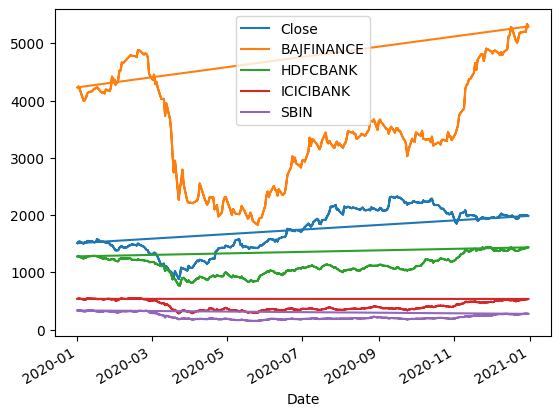

In [145]:
ax = temp_stocks[temp_stocks.Symbol=='RELIANCE'].plot(y='Close', use_index=True)

for company in top_5_stocks[1:]:
    temp_stocks[temp_stocks.Symbol==company].plot(y='Close', label=company, use_index=True, ax=ax)

### `Problem-7` Scatter plot Close price vs Volume for TOP-5 Stocks in year 2021
* Color on Symbol Column

In [156]:
stocks

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
Date,,,,,,,,,,,,,
2000-01-03,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN
2000-01-04,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN
2000-01-05,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN
2000-01-06,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN
2000-01-07,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-02-11,2009-02-11,INDUSINDBK,EQ,34.35,33.95,35.40,33.25,35.25,35.05,34.52,211307,7.294333e+11,NaN
2009-02-12,2009-02-12,INDUSINDBK,EQ,35.05,35.40,36.80,34.60,35.10,34.85,35.63,248230,8.844395e+11,NaN
2009-02-13,2009-02-13,INDUSINDBK,EQ,34.85,34.95,35.90,34.10,34.50,34.45,35.04,175355,6.143661e+11,NaN


In [174]:
stocks_2021_df = stocks.groupby('Symbol')['Turnover'].sum().sort_values(ascending = False).head()

top5_stocks_2021 = stocks[stocks['Symbol'].isin(stocks_2021_df.index)]
# top5_stocks_2021 = top5_stocks_2021[top5_stocks_2021['Date'].year() == 2021]
top5_stocks_2021 = top5_stocks_2021[top5_stocks_2021.index.year == 2021]
top5_stocks_2021

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
Date,,,,,,,,,,,,,
2021-01-01,2021-01-01,RELIANCE,EQ,1985.30,1988.00,1997.00,1982.00,1988.00,1987.50,1989.50,4622002,9.195480e+14,139680.0
2021-01-04,2021-01-04,RELIANCE,EQ,1987.50,1995.10,1998.90,1968.00,1990.25,1990.85,1982.61,11312992,2.242920e+15,316871.0
2021-01-05,2021-01-05,RELIANCE,EQ,1990.85,1969.00,1983.60,1956.00,1965.00,1966.10,1968.87,11132803,2.191900e+15,300233.0
2021-01-06,2021-01-06,RELIANCE,EQ,1966.10,1965.90,1966.00,1905.15,1915.50,1914.25,1928.17,21414270,4.129040e+15,659284.0
2021-01-07,2021-01-07,RELIANCE,EQ,1914.25,1920.50,1945.00,1905.15,1912.80,1911.15,1919.86,14918406,2.864130e+15,454695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,SBIN,EQ,336.45,339.25,347.45,339.25,344.80,344.30,345.26,49234985,1.699870e+15,306217.0
2021-04-27,2021-04-27,SBIN,EQ,344.30,344.00,354.95,342.40,354.20,353.05,349.42,46003023,1.607460e+15,293357.0
2021-04-28,2021-04-28,SBIN,EQ,353.05,357.00,364.30,356.05,362.90,363.40,361.63,56696255,2.050310e+15,337002.0


In [176]:
top5_stocks_2021['Symbol'] = top5_stocks_2021['Symbol'].astype('category')

<Axes: xlabel='Close', ylabel='Volume'>

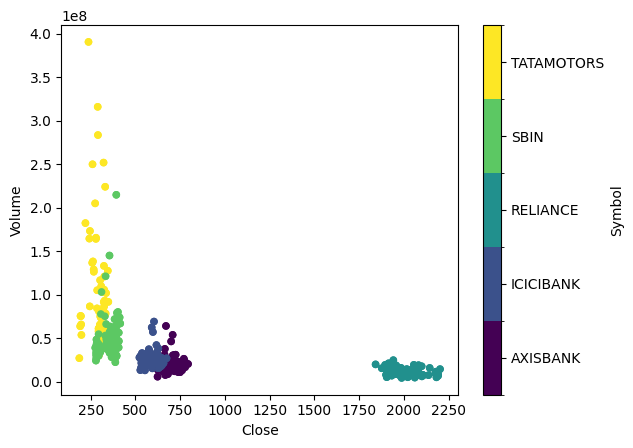

In [177]:
top5_stocks_2021.plot(kind='scatter', x='Close', y='Volume', c='Symbol', colormap='viridis')

### `Problem-8` Create a 3-D Scatter Plot using `time,x,y` on below synthetic data. and give color gradiant on `z`
```
# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
```

In [178]:
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
data

,time,x,y,z
0,0.00000,0.000000,1.000000,0.00000
1,0.10101,0.100838,0.994903,0.10101
2,0.20202,0.200649,0.979663,0.20202
3,0.30303,0.298414,0.954437,0.30303
4,0.40404,0.393137,0.919480,0.40404
...,...,...,...,...
95,9.59596,-0.170347,-0.985384,9.59596
96,9.69697,-0.268843,-0.963184,9.69697
97,9.79798,-0.364599,-0.931165,9.79798
98,9.89899,-0.456637,-0.889653,9.89899


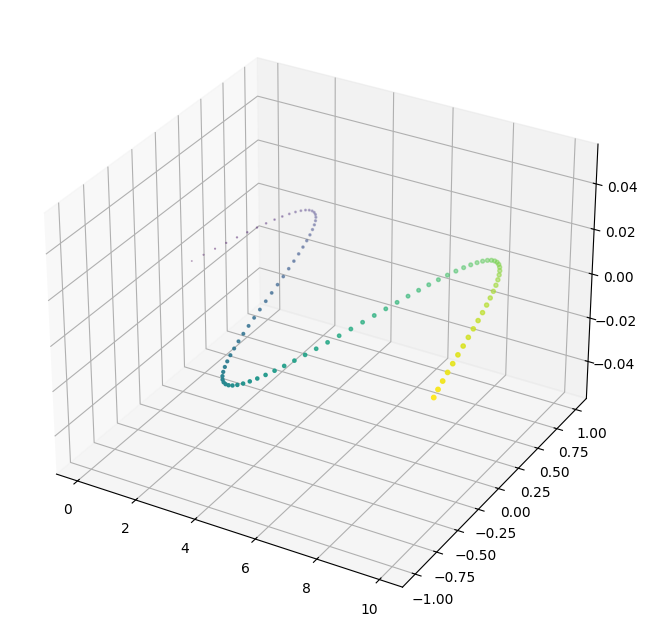

In [181]:
fig = plt.figure(figsize = (8, 8))
# ax = plt.add_subplot(projection = '3d')
ax = fig.add_subplot(projection = '3d')
ax = plt.scatter(data['time'], data['x'], data['z'], c = data['z'])

### `Problem 9:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = sin(\sqrt{x^2 + y^2})$$


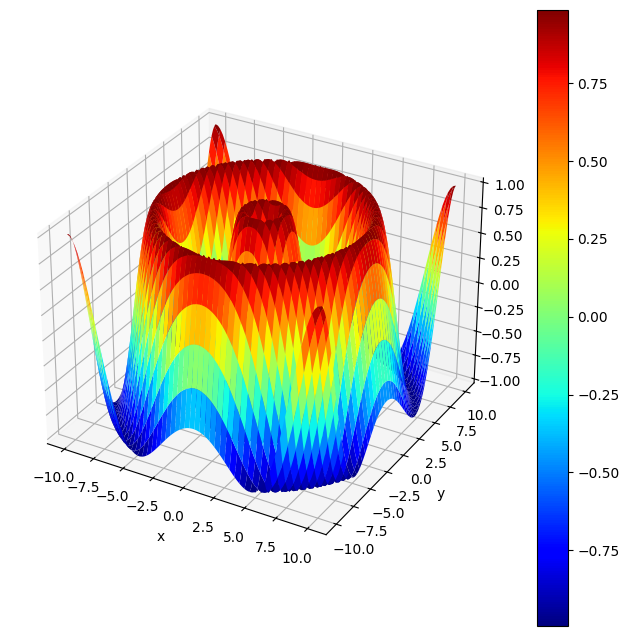

In [148]:
z = np.sin(np.sqrt(xx**2 + yy**2))
fig = plt.figure(figsize = (8, 8))

ax = plt.subplot(projection = '3d')

sub = ax.plot_surface(xx, yy, z, cmap = 'jet')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.colorbar(sub)

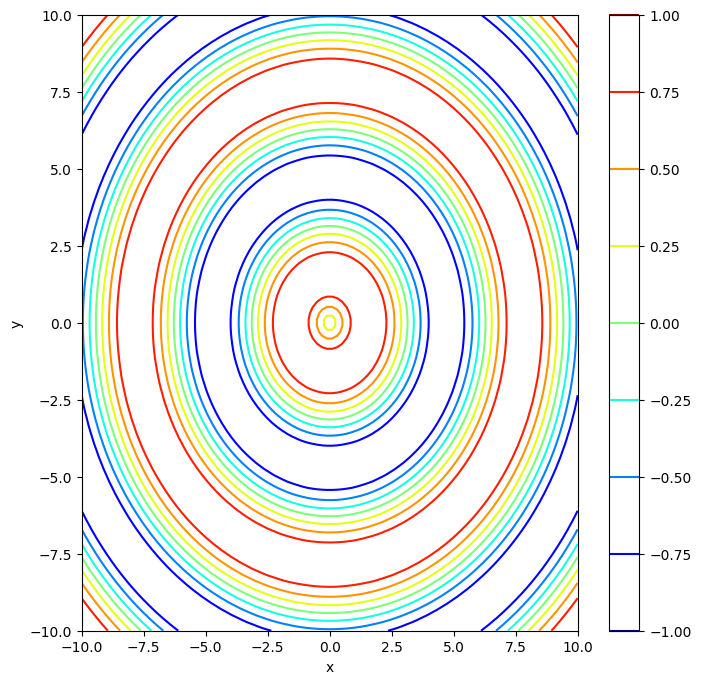

In [149]:
z = np.sin(np.sqrt(xx**2 + yy**2))
fig = plt.figure(figsize = (8, 8))

ax = plt.subplot()

sub = ax.contour(xx, yy, z, cmap = 'jet')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.colorbar(sub)

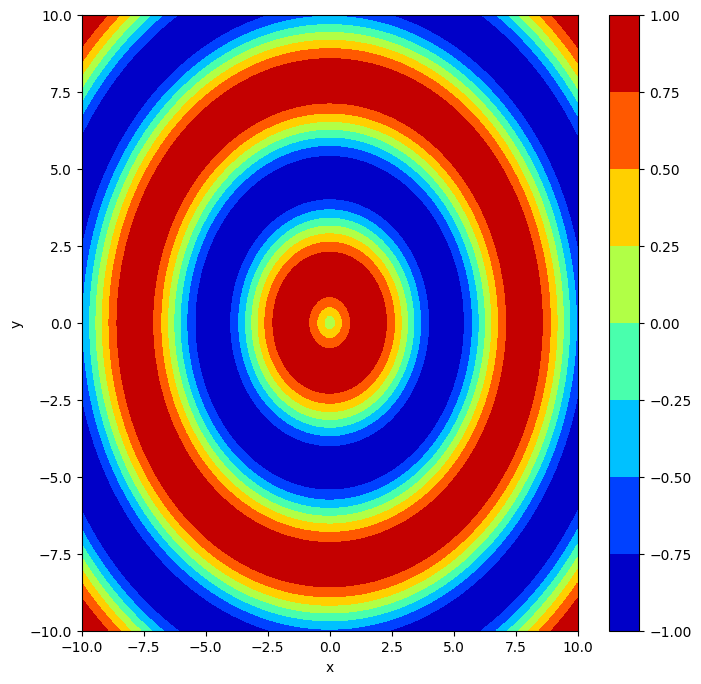

In [151]:
fig = plt.figure(figsize = (8, 8))

ax = plt.subplot()

sub = ax.contourf(xx, yy, z, cmap = 'jet')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.colorbar(sub)

### `Problem 10:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = tan(\log_2({x^2 + y^2})$$

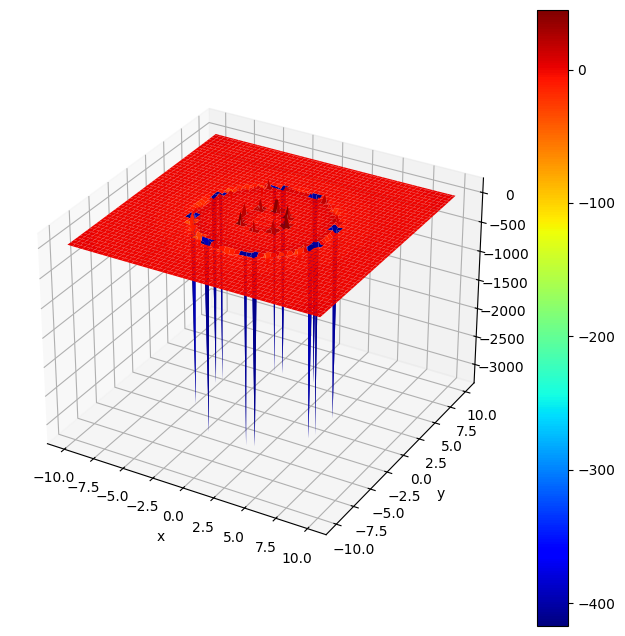

In [152]:
z = np.tan(np.log2(xx**2 + yy**2))
fig = plt.figure(figsize = (8, 8))

ax = plt.subplot(projection = '3d')

sub = ax.plot_surface(xx, yy, z, cmap = 'jet')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.colorbar(sub)

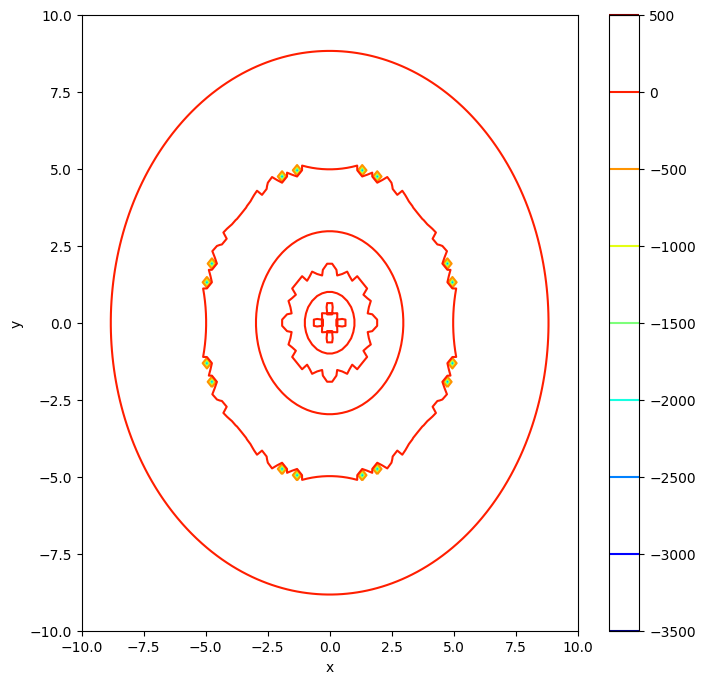

In [154]:
fig = plt.figure(figsize = (8, 8))

ax = plt.subplot()

sub = ax.contour(xx, yy, z, cmap = 'jet')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.colorbar(sub)

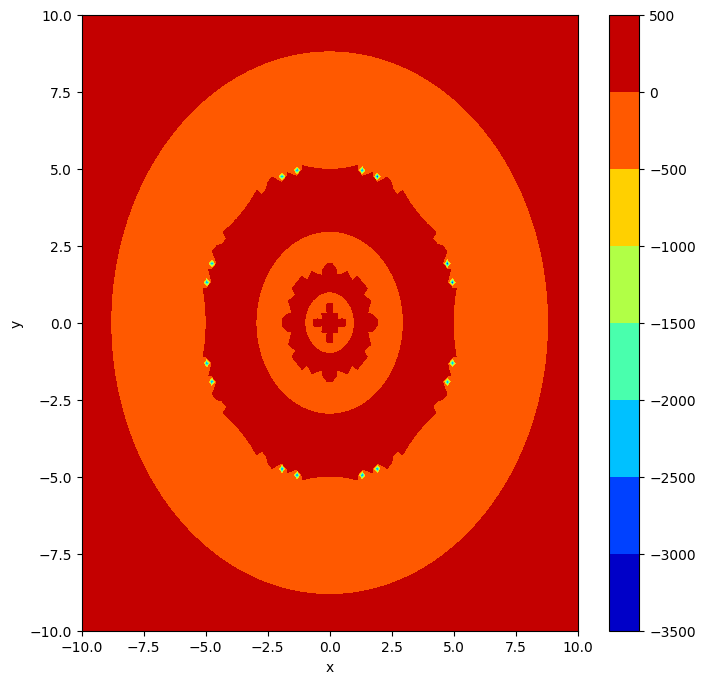

In [155]:
fig = plt.figure(figsize = (8, 8))

ax = plt.subplot()

sub = ax.contourf(xx, yy, z, cmap = 'jet')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.colorbar(sub)